<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [3]</a>'.</span>

# Import dependencies

In [10]:
# Import management
from importlib import reload

# Data Manipulations and Preprocessing
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Services
import services.ModelStageService as sds

# utils
import utils.EDAUtils as eda_utils

reload(sds)
reload(eda_utils)

sns.set_style('darkgrid')
sns.color_palette('pastel')

stage_data_io_service = sds.ModelStageService(previous_stage_name=sds.EDA_STAGE, current_stage_name=sds.PREPROCESSING_STAGE)

# Load data

In [11]:
# Reading text from txt file
df = stage_data_io_service.run_or_load_stage_data(reload_stage=False)

Reload stage False path ../../data/stages/EDA_stage_data.pkl exists True
Loading EDA from snapshot.
Loading EDA from snapshot.


In [12]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,creditDebt,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,creditLimitRange
0,737265056,737265056,5000.0,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,0-25%
1,737265056,737265056,5000.0,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,0-25%
2,737265056,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,0-25%
3,737265056,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,0-25%
4,830329091,830329091,5000.0,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,0-25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000.0,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,...,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False,75-100%
786359,732852505,732852505,50000.0,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,...,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False,75-100%
786360,732852505,732852505,50000.0,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,...,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False,75-100%
786361,732852505,732852505,50000.0,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,...,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False,75-100%


# Data preprocessing

## Drop useless/empty columns

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [13]:
df = df.drop(
    columns={'recurringAuthInd', 'posOnPremises', 'merchantName', 'merchantZip', 'merchantState', 'merchantCity',
             'echoBuffer', 'cardLast4Digits'})
eda_utils.data_summary(df)

Dimensions: 786363 rows, 22 columns
Total NA's: 10447
There are no duplicates in this dataset!
Column Name                            Data Type  Count Distinct  NA Values 
accountNumber                          object     5000            0         
customerId                             object     5000            0         
creditLimit                            float64    10              0         
availableMoney                         float64    521916          0         
transactionDateTime                    datetime64[ns] 776637          0         
transactionAmount                      float64    66038           0         
acqCountry                             object     4               4562      
merchantCountryCode                    object     4               724       
posEntryMode                           object     5               4054      
posConditionCode                       object     3               409       
merchantCategoryCode                   object     19  

In [14]:
# On the surface it seems that column accountNumber equals customerId. 
# So if it is true - let`s drop one of them

if (len(df[df.accountNumber != df.customerId]) == 0):
    df = df.drop(columns={'customerId'})
    eda_utils.data_summary(df)

Dimensions: 786363 rows, 21 columns
Total NA's: 10447
There are no duplicates in this dataset!
Column Name                            Data Type  Count Distinct  NA Values 
accountNumber                          object     5000            0         
creditLimit                            float64    10              0         
availableMoney                         float64    521916          0         
transactionDateTime                    datetime64[ns] 776637          0         
transactionAmount                      float64    66038           0         
acqCountry                             object     4               4562      
merchantCountryCode                    object     4               724       
posEntryMode                           object     5               4054      
posConditionCode                       object     3               409       
merchantCategoryCode                   object     19              0         
currentExpDate                         datetime64[ns] 

## Visualize null values

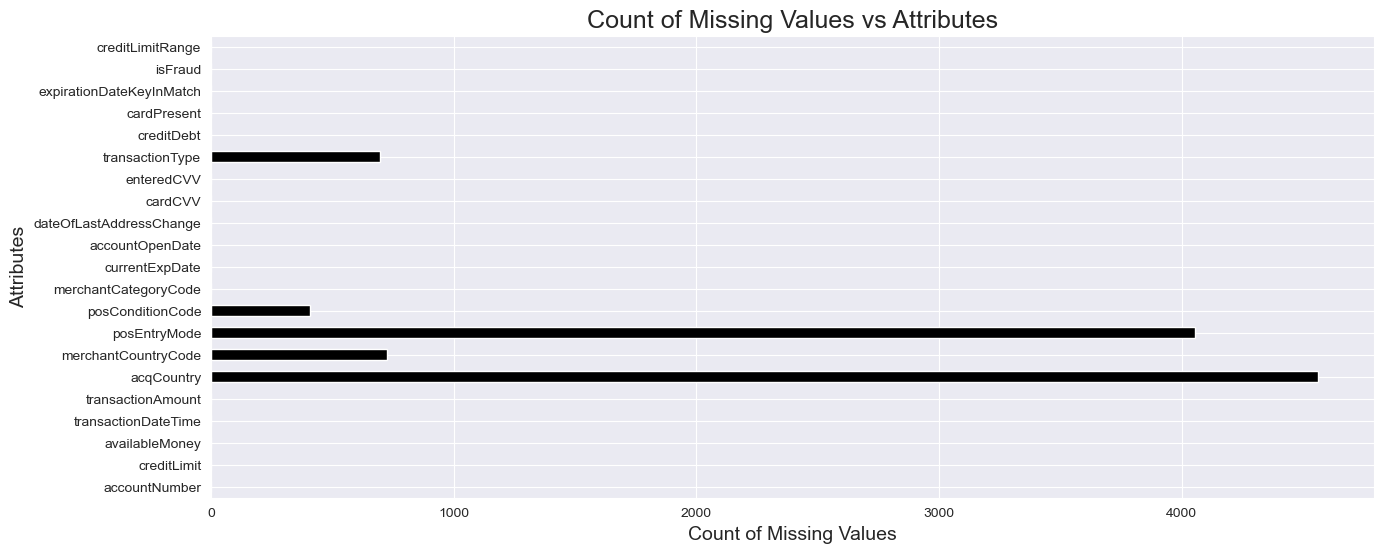

In [15]:
plt.figure(figsize=(15, 6))
df.isnull().sum().plot(kind='barh', color='black')
plt.xlabel('Count of Missing Values', fontsize=14)
plt.ylabel('Attributes', fontsize=14)
plt.title('Count of Missing Values vs Attributes', fontsize=18)
plt.show()

## Fill N/A

In [16]:
def fill_na_in_transaction_type(df):
    """
    Fills missing transaction types based on logical deductions using available balances and transaction amounts.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing transaction data, which must include columns 'accountNumber', 
                       'transactionDateTime', 'transactionAmount', 'availableMoney', and 'transactionType'.
    
    Returns:
    pd.DataFrame: The original DataFrame with missing 'transactionType' values filled based on specified rules.
    
    Process:
    1. Sorts the DataFrame by 'accountNumber' and 'transactionDateTime' to arrange transactions chronologically for each account.
    2. For each account (grouped by 'accountNumber'):
       - Iterates over transactions to identify consecutive transactions.
       - For each transaction with a missing 'transactionType', compares it with the next transaction in the group.
       - Determines the 'transactionType' based on the following logic:
         - **ADDRESS_VERIFICATION**: if 'availableMoney' remains the same between the current and next transactions.
         - **PURCHASE**: if 'availableMoney' decreases by exactly the transaction amount, or is lower than in the next transaction.
         - **REVERSAL**: if 'availableMoney' increases or equals the previous balance plus the transaction amount.
       - If there is no subsequent transaction, assigns a default type ('DEFAULT_TYPE') for flexibility.
    3. Returns the DataFrame with filled values for 'transactionType'.
    
    Usage Example:
        df = fill_na_in_transaction_type(df)
        df.drop(df[df['transactionType'] == 'DEFAULT_TYPE'].index, inplace=True)
        simple_eda(df)
    
    Notes:
    - The 'transactionType' column is modified based on financial logic, useful for filling gaps in historical data.
    - Sorting by 'accountNumber' and 'transactionDateTime' ensures transactions are evaluated in a realistic sequence.
    - If no subsequent transaction exists, assigns a placeholder type ('DEFAULT_TYPE') to be dropped later if needed.
    """
    # Sort by account number and transaction date/time
    df = df.sort_values(['accountNumber', 'transactionDateTime']).reset_index(drop=True)
    
    # Iterate over each group of transactions by account number
    for account, transactions in df.groupby('accountNumber'):
        if len(transactions[transactions['transactionType'].isnull()]) > 0:
            for i in range(0, len(transactions)):  # Start from the second transaction
                current_transaction = transactions.iloc[i]
                
                # Check if it's not the last transaction in the group
                if i + 1 < len(transactions):
                    next_transaction = transactions.iloc[i + 1]
                else:
                    next_transaction = None  # If it's the last transaction, set next_transaction to None
                
                # If current transaction type is NaN, proceed with the logic
                if pd.isna(current_transaction['transactionType']):
                    current_transaction_amount = current_transaction['transactionAmount']
                    current_transaction_available_money = current_transaction['availableMoney']
                    
                    if next_transaction is not None:
                        next_transaction_available_money = next_transaction['availableMoney']
                    
                        # Apply the logic for determining the transaction type based on available money and amounts
                        if current_transaction_available_money == next_transaction_available_money:
                            df.loc[current_transaction.name, 'transactionType'] = 'ADDRESS_VERIFICATION'
                        elif (current_transaction_available_money > next_transaction_available_money) or (current_transaction_available_money - current_transaction_amount == next_transaction_available_money):
                            df.loc[current_transaction.name, 'transactionType'] = 'PURCHASE'
                        elif (current_transaction_available_money < next_transaction_available_money) or (current_transaction_available_money + current_transaction_amount == next_transaction_available_money):
                            df.loc[current_transaction.name, 'transactionType'] = 'REVERSAL'
                    
                    # If there is no next transaction, we can set a default type or handle it accordingly
                    else:
                        # In case no next transaction is available, you could assign a default type or leave it NaN
                        df.loc[current_transaction.name, 'transactionType'] = 'DEFAULT_TYPE'  # Replace 'DEFAULT_TYPE' with your logic

    df.drop(df[df['transactionType'] == 'DEFAULT_TYPE'].index, inplace=True)
    return df
df = stage_data_io_service.run_or_load_snapshot_data('fill_na_in_transaction_type', fill_na_in_transaction_type, df, recreate_snapshot=False)
eda_utils.data_summary(df)

Loading fill_na_in_transaction_type from snapshot.
Dimensions: 786360 rows, 21 columns
Total NA's: 9749
There are no duplicates in this dataset!
Column Name                            Data Type  Count Distinct  NA Values 
accountNumber                          object     5000            0         
creditLimit                            float64    10              0         
availableMoney                         float64    521914          0         
transactionDateTime                    datetime64[ns] 776634          0         
transactionAmount                      float64    66038           0         
acqCountry                             object     4               4562      
merchantCountryCode                    object     4               724       
posEntryMode                           object     5               4054      
posConditionCode                       object     3               409       
merchantCategoryCode                   object     19              0         
curr

In [17]:
def fill_na_in_account_related_columns(df):
    """
    Fills missing values in account-related columns ('acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode') 
    within each account group by replacing them with the most frequent (mode) value for each column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing transaction data, which must include the columns 
                       'accountNumber', 'transactionDateTime', 'acqCountry', 'merchantCountryCode', 
                       'posEntryMode', and 'posConditionCode'.

    Returns:
    pd.DataFrame: The original DataFrame with missing values filled in specified columns based on 
                  the mode for each accountNumber.
    """
    
    gen_acq_country_mode = df['acqCountry'].mode().iloc[0]
    gen_merchant_country_mode = df['merchantCountryCode'].mode().iloc[0]
    gen_pos_entry_mode = df['posEntryMode'].mode().iloc[0]
    gen_pos_condition_mode = df['posConditionCode'].mode().iloc[0]
    
    
    # Iterate over each group of transactions by account number
    for account, transactions in df.groupby('accountNumber'):
        # Calculate the mode for each column in the group
        acq_country_mode = transactions['acqCountry'].mode().iloc[0] if not transactions['acqCountry'].mode().empty else gen_acq_country_mode
        merchant_country_mode = transactions['merchantCountryCode'].mode().iloc[0] if not transactions['merchantCountryCode'].mode().empty else gen_merchant_country_mode
        pos_entry_mode = transactions['posEntryMode'].mode().iloc[0] if not transactions['posEntryMode'].mode().empty else gen_pos_entry_mode
        pos_condition_mode = transactions['posConditionCode'].mode().iloc[0] if not transactions['posConditionCode'].mode().empty else gen_pos_condition_mode
        
        # Directly assign modes to missing values in the original DataFrame
        if acq_country_mode is not None:
            df.loc[transactions.index, 'acqCountry'] = df.loc[transactions.index, 'acqCountry'].replace({pd.NA: acq_country_mode})
        if merchant_country_mode is not None:
            df.loc[transactions.index, 'merchantCountryCode'] = df.loc[transactions.index, 'merchantCountryCode'].replace({pd.NA: merchant_country_mode})
        if pos_entry_mode is not None:
            df.loc[transactions.index, 'posEntryMode'] = df.loc[transactions.index, 'posEntryMode'].replace({pd.NA: pos_entry_mode})
        if pos_condition_mode is not None:
            df.loc[transactions.index, 'posConditionCode'] = df.loc[transactions.index, 'posConditionCode'].replace({pd.NA: pos_condition_mode})
    
    return df

# Example usage
df = stage_data_io_service.run_or_load_snapshot_data('fill_na_in_account_related_columns', fill_na_in_account_related_columns, df, recreate_snapshot=False)
eda_utils.data_summary(df)

Loading fill_na_in_account_related_columns from snapshot.
Dimensions: 786360 rows, 21 columns
Total NA's: 0
There are no duplicates in this dataset!
Column Name                            Data Type  Count Distinct  NA Values 
accountNumber                          object     5000            0         
creditLimit                            float64    10              0         
availableMoney                         float64    521914          0         
transactionDateTime                    datetime64[ns] 776634          0         
transactionAmount                      float64    66038           0         
acqCountry                             object     4               0         
merchantCountryCode                    object     4               0         
posEntryMode                           object     5               0         
posConditionCode                       object     3               0         
merchantCategoryCode                   object     19              0         


In [18]:
stage_data_io_service.write_stage_data(df)